<a href="https://colab.research.google.com/github/KhinMyatNandar/Project/blob/main/Sustainable_Energy_MLOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import missingno as msno

from sklearn.model_selection import train_test_split

In [ ]:
SustainableEnergy= pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')

In [ ]:
df=pd.DataFrame(SustainableEnergy)

#Checking the Null Value

In [ ]:
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [ ]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

# Replace correct column name


In [ ]:
new_column_names = {
    'Access to electricity (% of population)': 'Percentage_of_Population_Access_to_Electricity',
    'Access to clean fuels for cooking'      : 'Access_to_clean_fuels_for_cooking',
    'Renewable-electricity-generating-capacity-per-capita': 'Generating_Renewable_Electricity_Capacity_Per_Capital',
    'Financial flows to developing countries (US $)': 'Financial_Flow_in_US_Dollar',
    'Renewable energy share in the total final energy consumption (%)': 'Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption',
    'Electricity from fossil fuels (TWh)': 'Electricity_from_Fossil_Fuels_in_Terawatt_Hour',
    'Electricity from nuclear (TWh)': 'Electricity_from_Nuclear_in_Terawatt_Hour',
    'Electricity from renewables (TWh)': 'Electricity_from_Renewables_in_Terawatt_Hour',
    'Low-carbon electricity (% electricity)': 'Low_carbon_Electricity_in_Percentage',
    'Primary energy consumption per capita (kWh/person)': 'Energy_Consumption_Per_Person_in_Kilowatt_Hour',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy_Consumption_Per_GDP',
    'Value_co2_emissions_kt_by_country': 'Carbon_Emission_Per_Capita_in_Metric_Tons',
    'Renewables (% equivalent primary energy)': 'Renewable_Energy_Share_in_Total_Primary_Energy',
    'gdp_growth': 'GDP_Growth',
    'gdp_per_capita': 'GDP_Per_Capital',
    'Density\\n(P/Km2)':'Population_Density_Per_Sq_Km',
    'Land Area(Km2)': 'Land_Area_in_Square_Kilometers',
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

# Print updated column names to verify the changes
print(df.columns)


Index(['Entity', 'Year', 'Percentage_of_Population_Access_to_Electricity',
       'Access_to_clean_fuels_for_cooking',
       'Generating_Renewable_Electricity_Capacity_Per_Capital',
       'Financial_Flow_in_US_Dollar',
       'Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption',
       'Electricity_from_Fossil_Fuels_in_Terawatt_Hour',
       'Electricity_from_Nuclear_in_Terawatt_Hour',
       'Electricity_from_Renewables_in_Terawatt_Hour',
       'Low_carbon_Electricity_in_Percentage',
       'Energy_Consumption_Per_Person_in_Kilowatt_Hour',
       'Energy_Consumption_Per_GDP',
       'Carbon_Emission_Per_Capita_in_Metric_Tons',
       'Renewable_Energy_Share_in_Total_Primary_Energy', 'GDP_Growth',
       'GDP_Per_Capital', 'Population_Density_Per_Sq_Km',
       'Land_Area_in_Square_Kilometers', 'Latitude', 'Longitude'],
      dtype='object')


# Data-preprocessing

In [ ]:
#df=df.dropna(subset=['Latitude','Longitude','Land_Area_in_Square_Kilometers','Population_Density_Per_Sq_Km'])

In [ ]:
pip install pandas missingno matplotlib


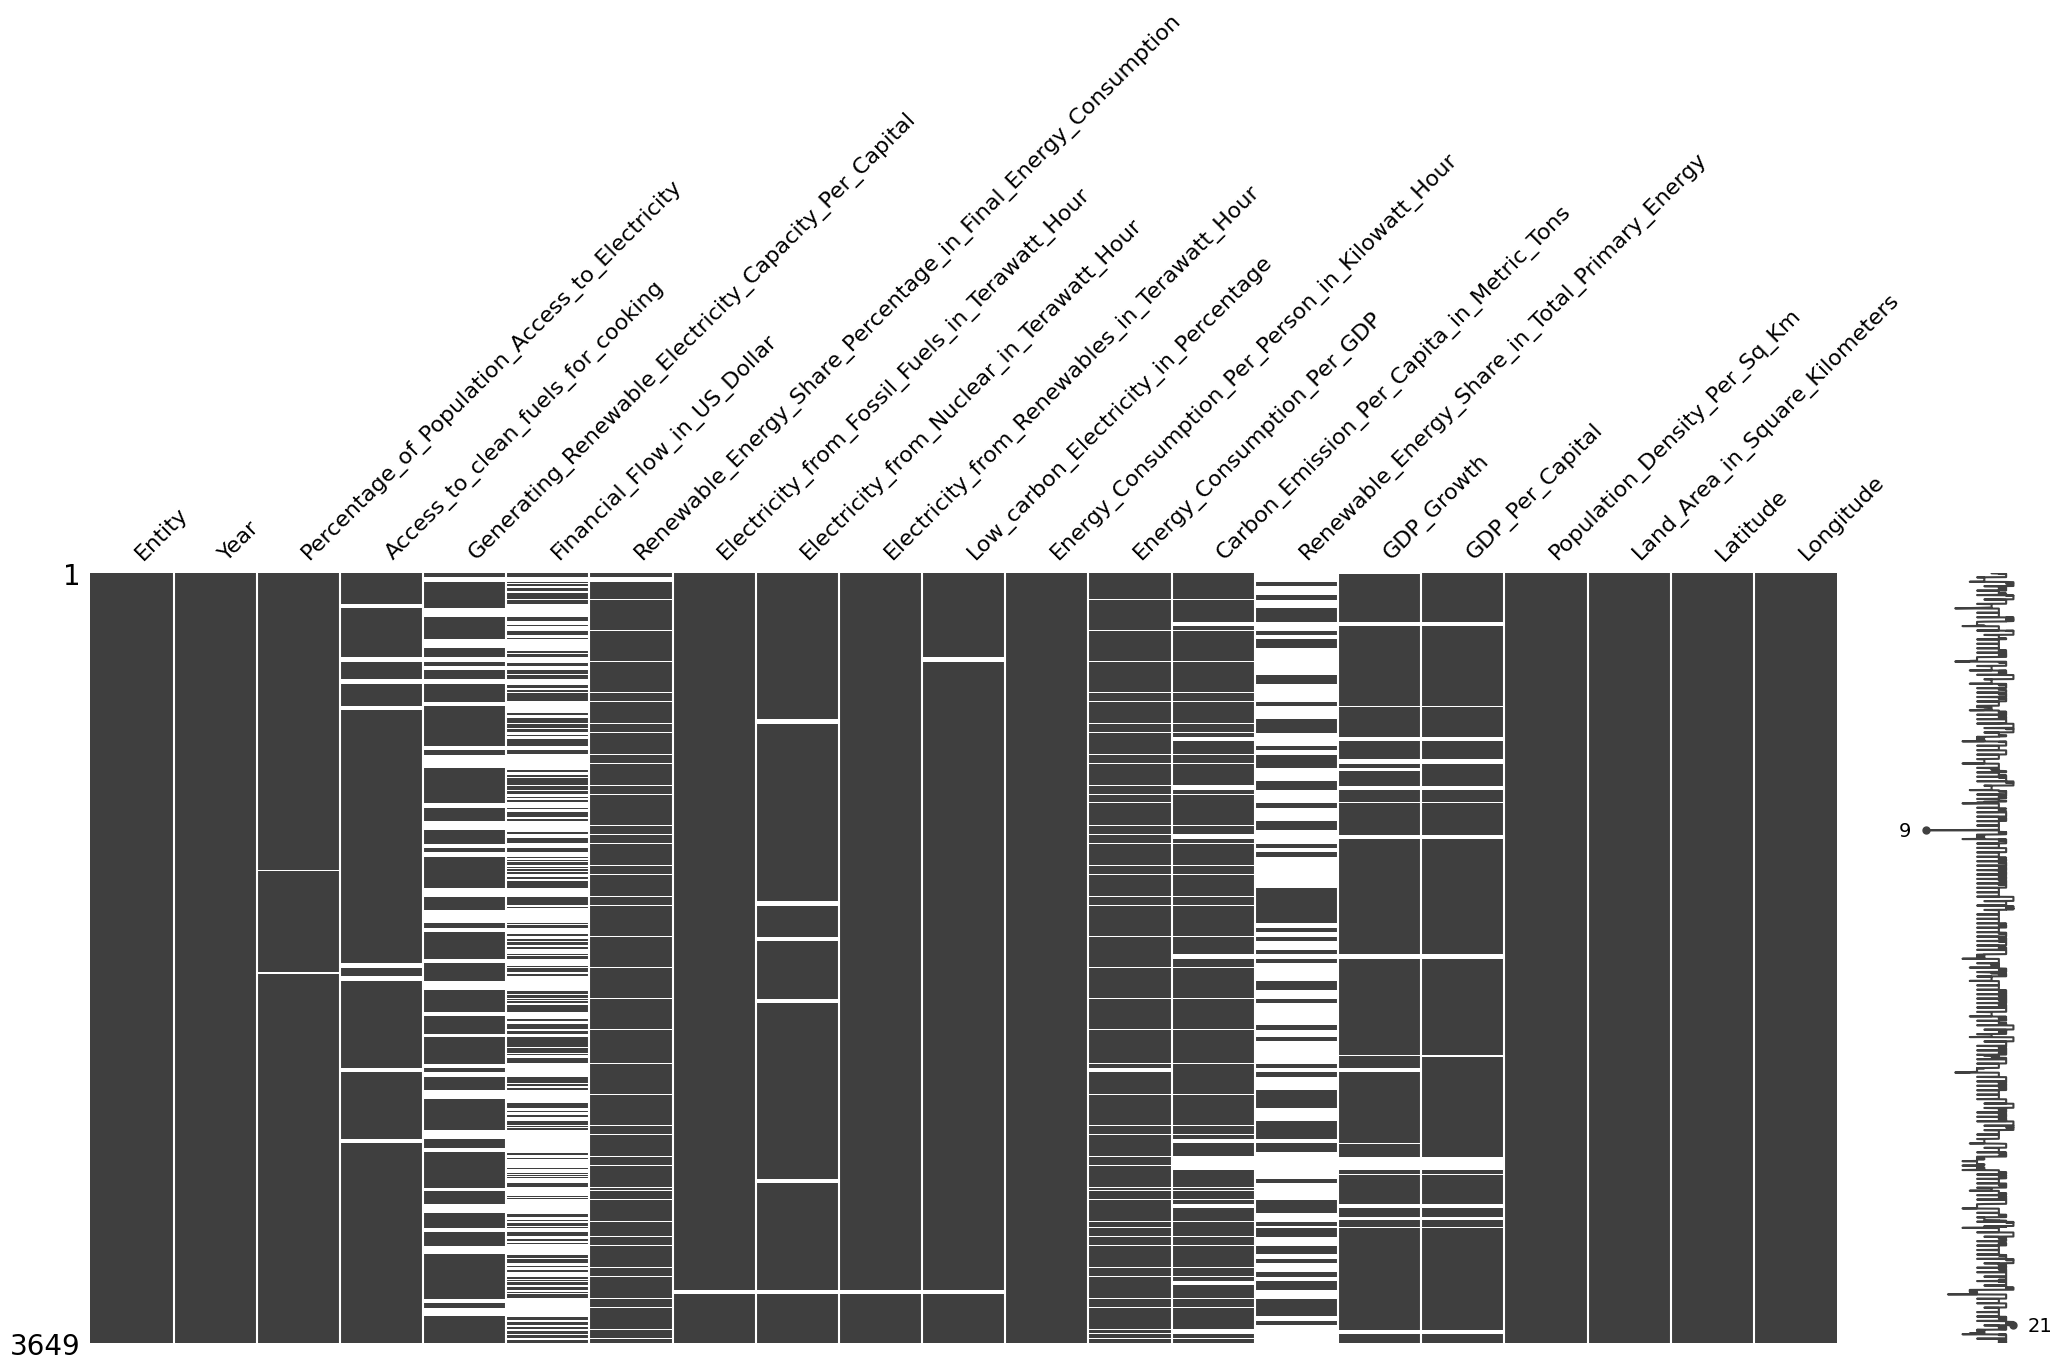

In [ ]:
# Visualizing the pattern of missing data
msno.matrix(df)
plt.show()

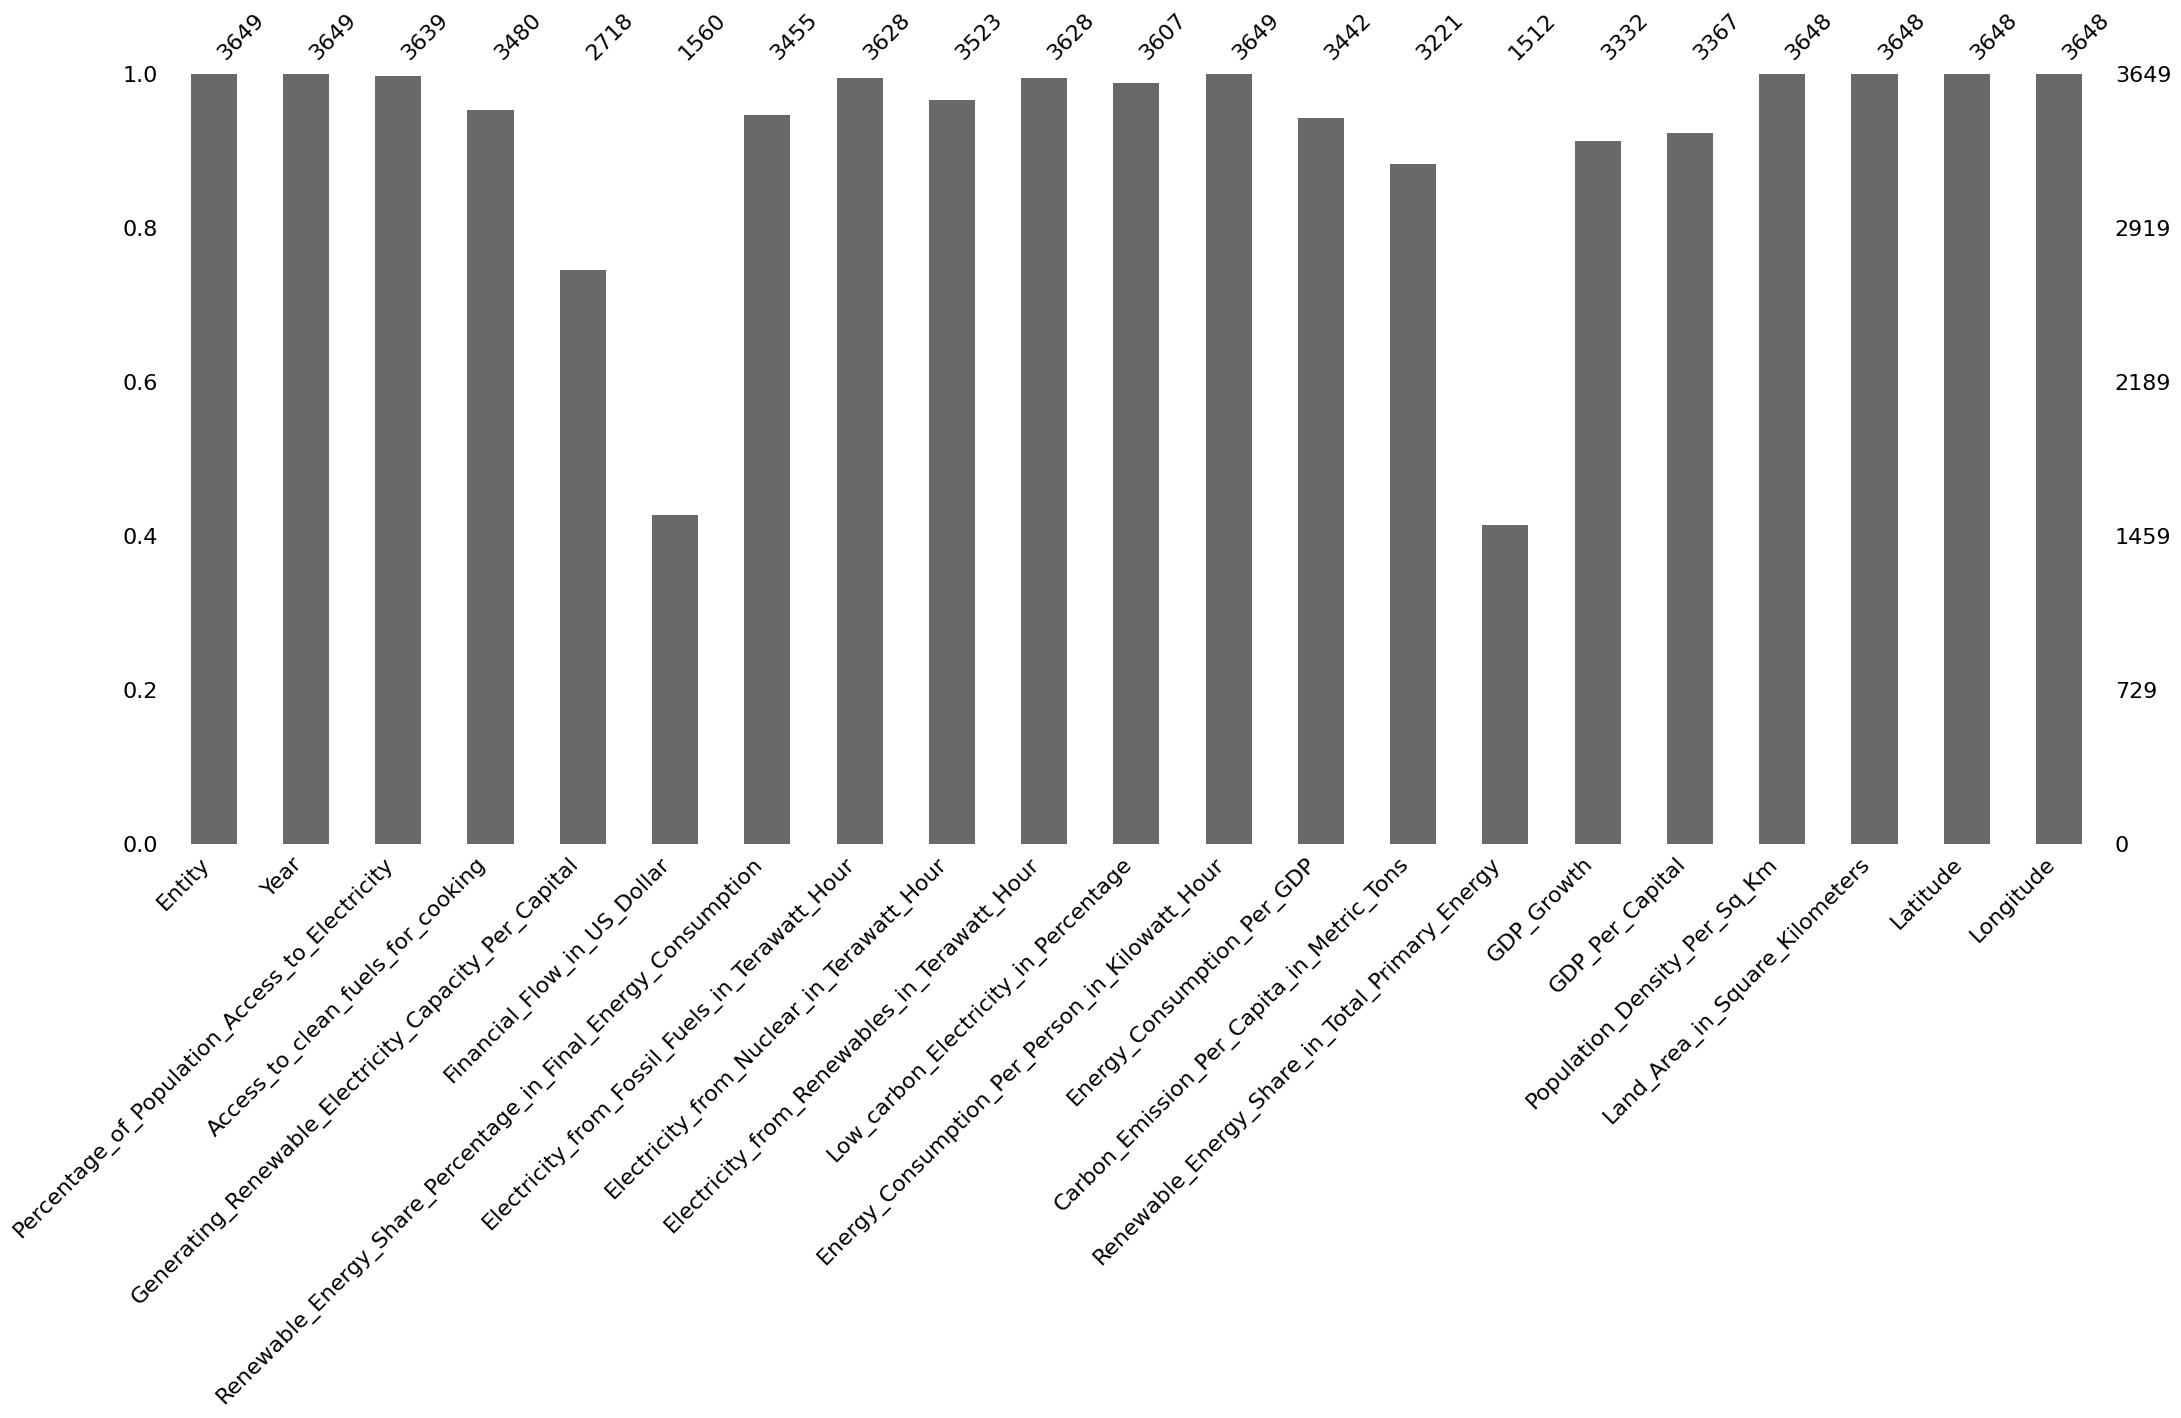

In [ ]:
# Visualize the bar chart for missing values
msno.bar(df)
plt.show()

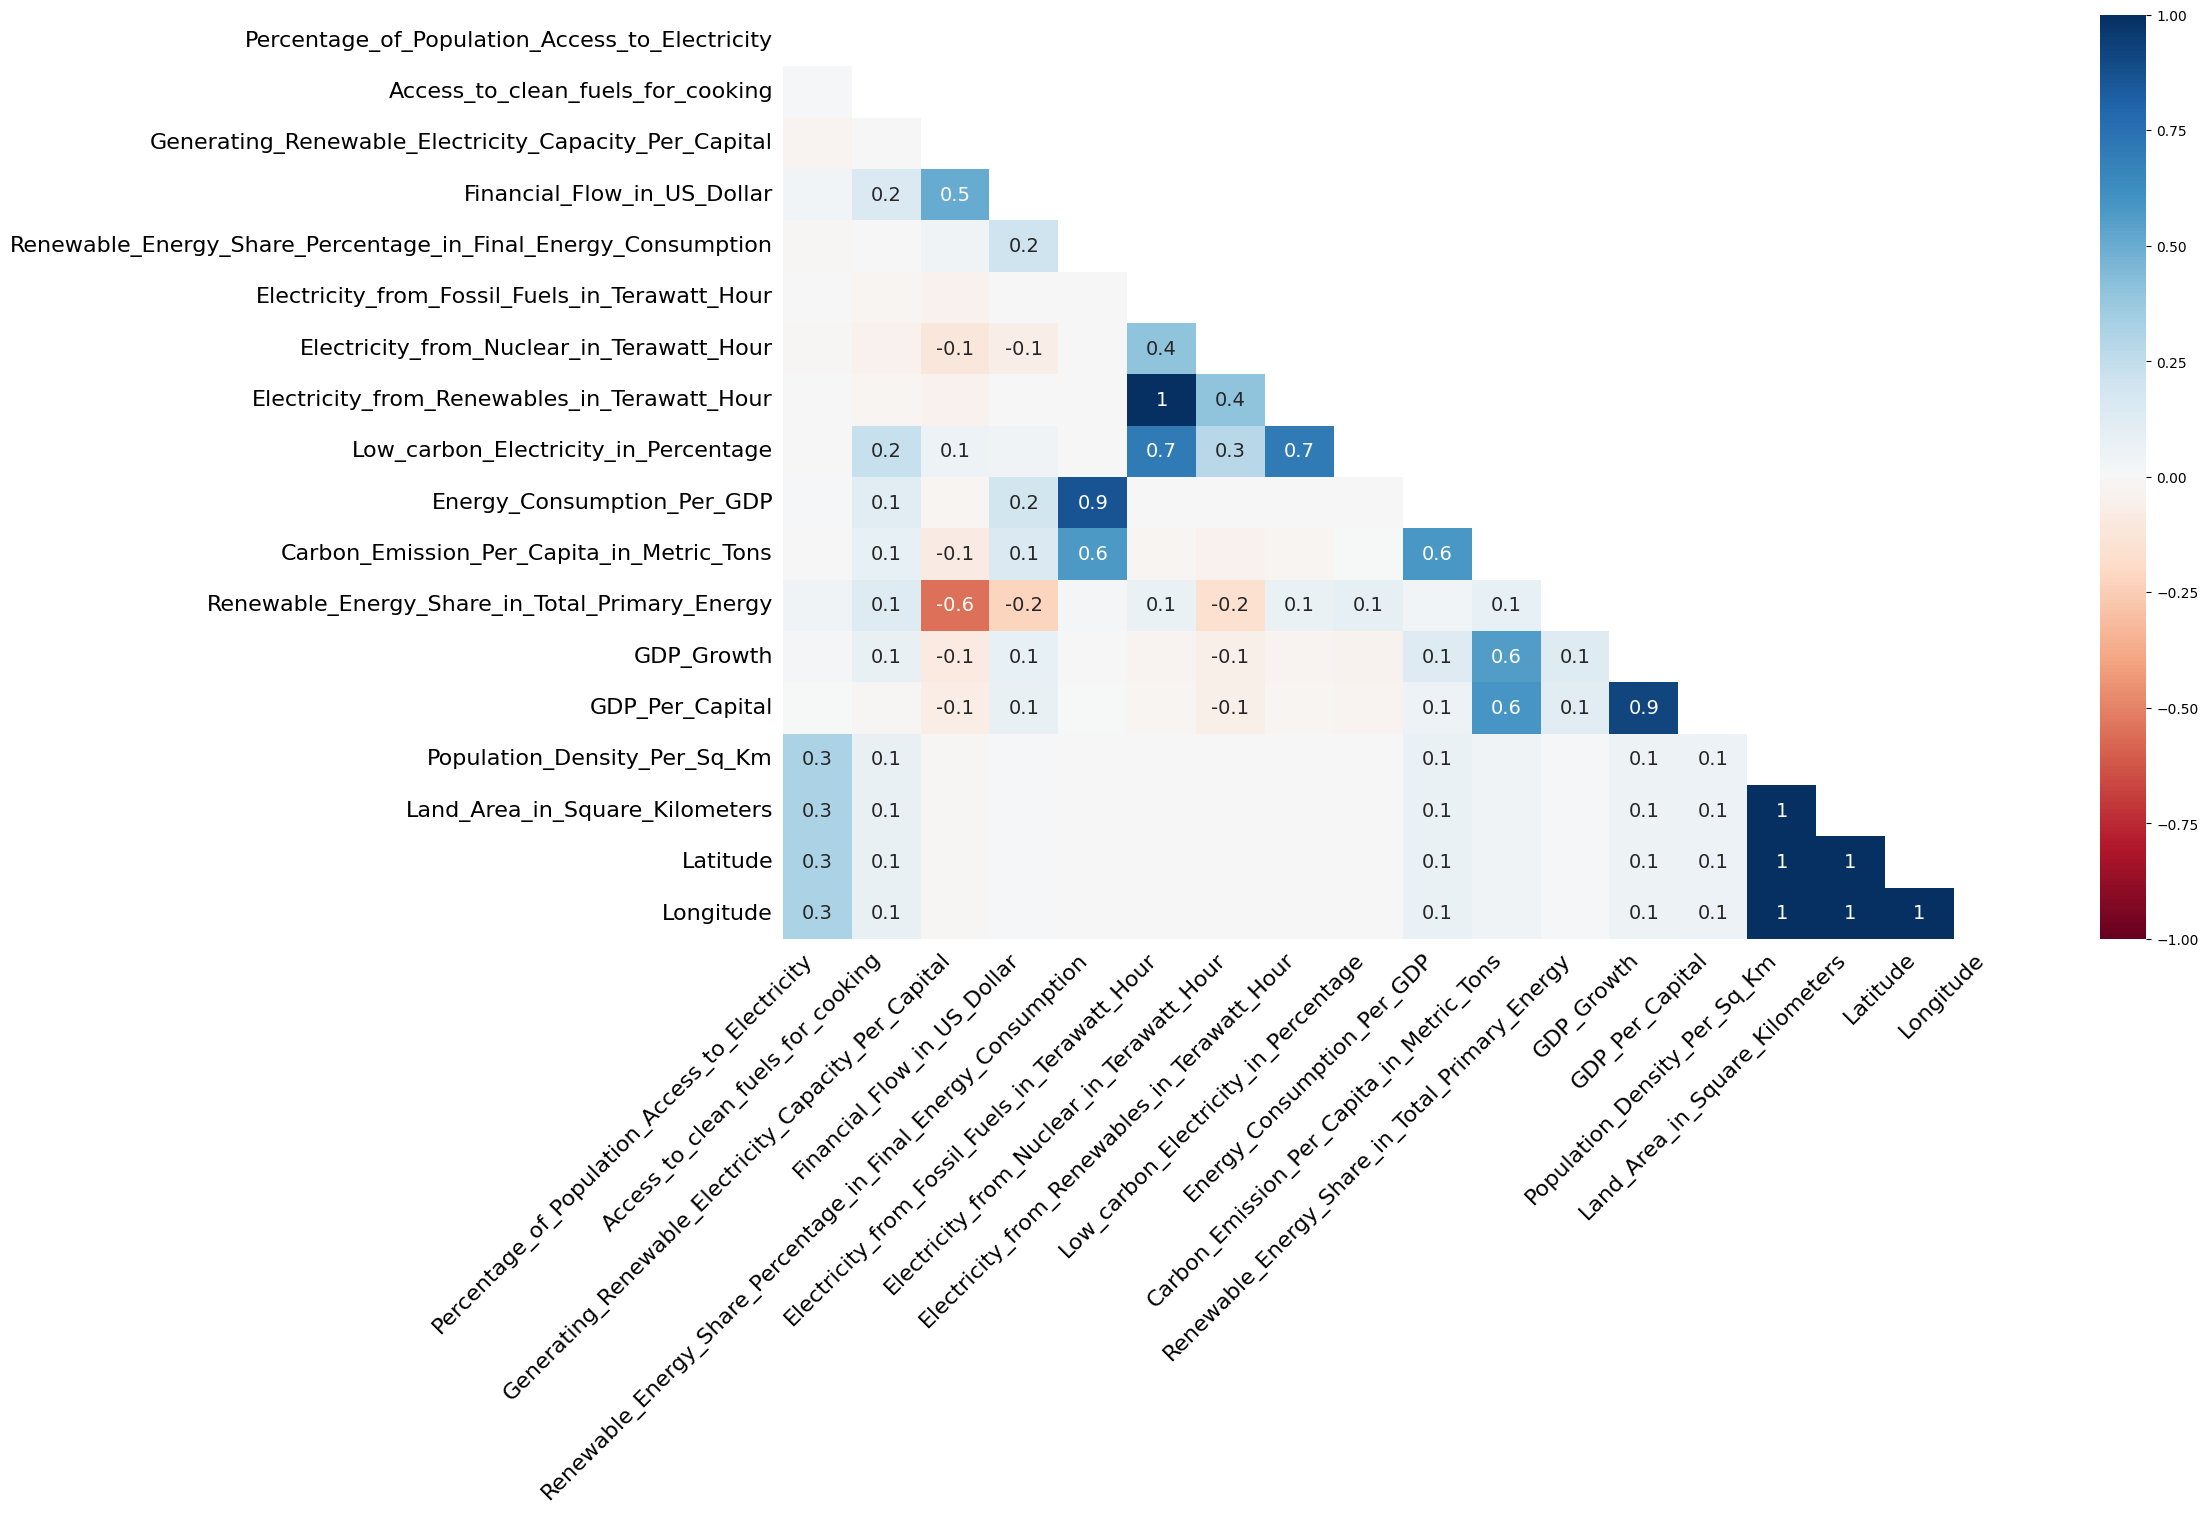

In [ ]:
# Heatmap to show the correlation of missingness between different columns
msno.heatmap(df)
plt.show()

In [ ]:
# Calculate the correlation matrix for numerical features, explicitly setting numeric_only to True
correlation_matrix = df.corr(numeric_only=True)

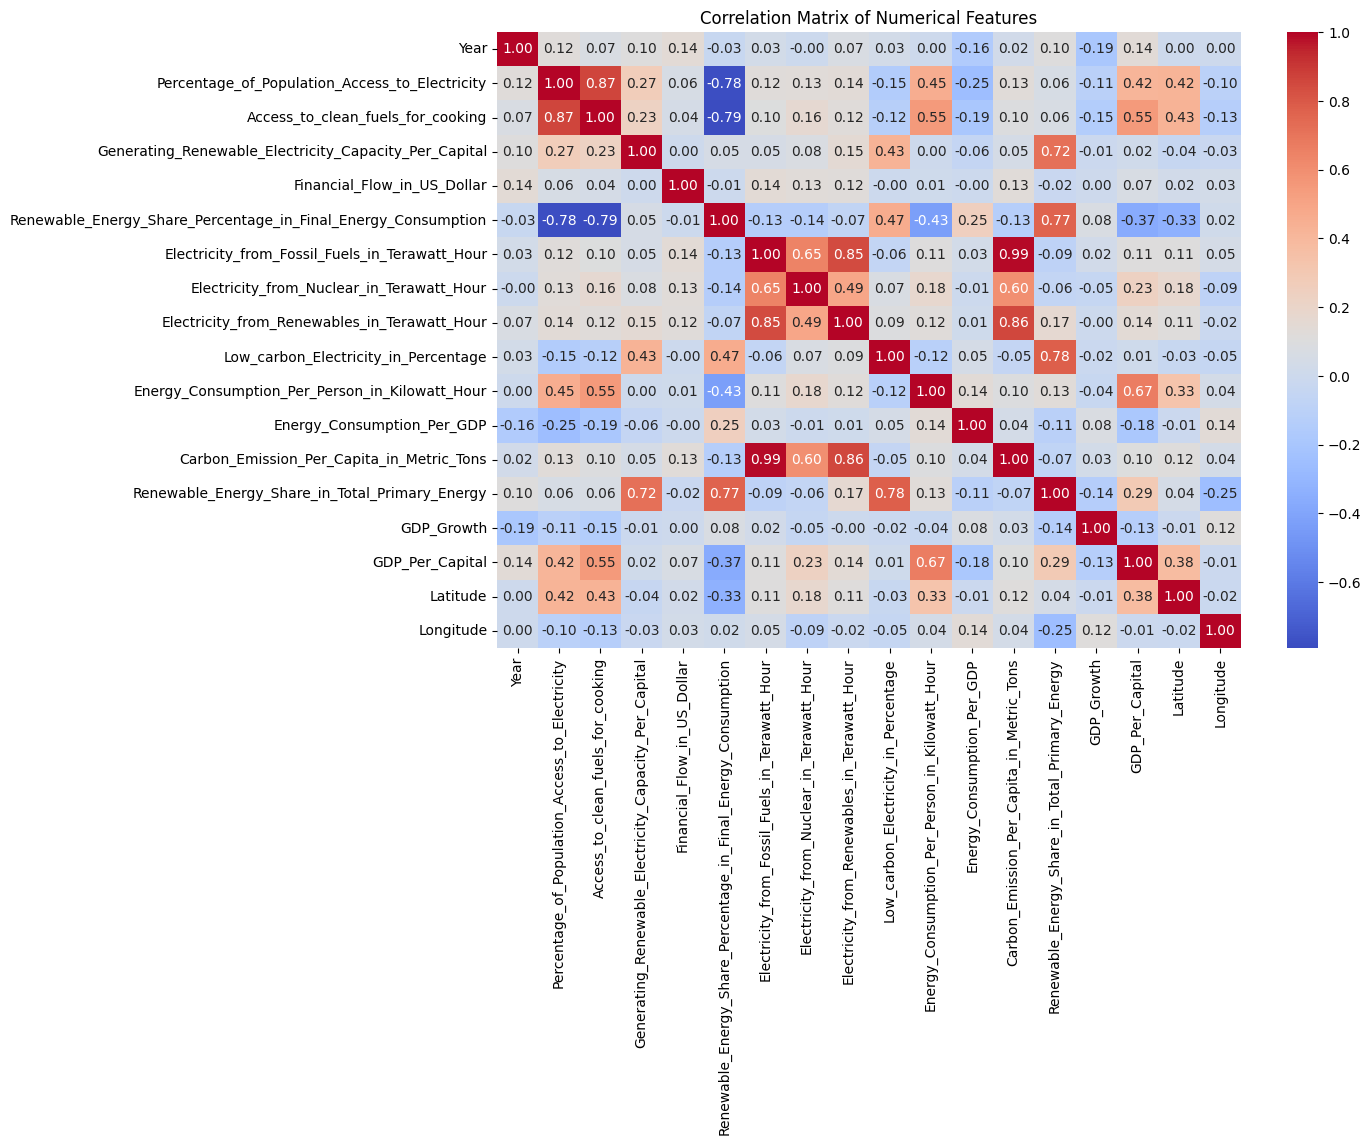

In [ ]:
# Use a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Correcting the string literal closure in the column name
df['Population_Density_per_Sq_Km'] = df['Population_Density_Per_Sq_Km'].str.replace(',', '').astype(float)
df['Land_Area_in_Square_Kilometers'] = df['Land_Area_in_Square_Kilometers'].str.replace(',', '').astype(float)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
#Apply KNN imputer on the numeric dataframe
#imputer = KNNImputer(n_neighbors=5, weights="uniform")
#df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

In [ ]:
df.isnull().sum()

Entity                                                              0
Year                                                                0
Percentage_of_Population_Access_to_Electricity                     10
Access_to_clean_fuels_for_cooking                                 169
Generating_Renewable_Electricity_Capacity_Per_Capital             931
Financial_Flow_in_US_Dollar                                      2089
Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption     194
Electricity_from_Fossil_Fuels_in_Terawatt_Hour                     21
Electricity_from_Nuclear_in_Terawatt_Hour                         126
Electricity_from_Renewables_in_Terawatt_Hour                       21
Low_carbon_Electricity_in_Percentage                               42
Energy_Consumption_Per_Person_in_Kilowatt_Hour                      0
Energy_Consumption_Per_GDP                                        207
Carbon_Emission_Per_Capita_in_Metric_Tons                         428
Renewable_Energy_Sha

In [ ]:
columns_to_fill = [
    "Percentage_of_Population_Access_to_Electricity",
    "Generating_Renewable_Electricity_Capacity_Per_Capital",
    "Financial_Flow_in_US_Dollar",
    "Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption",
    "Energy_Consumption_Per_GDP",
    "Carbon_Emission_Per_Capita_in_Metric_Tons",
    "Renewable_Energy_Share_in_Total_Primary_Energy",
    "GDP_Growth",
    "GDP_Per_Capital"
]

In [ ]:
# method 1: Filling missing values with assumptions with 16 missing records, all filled up with zero

# Loop through each column
for column in df.columns[2:]:  # Assuming the first two columns are 'country' and 'year'
    # Group by 'country' and count missing values for each group
    country_missing_count = df[df[column].isnull()].groupby('Entity')['Entity'].count()

    # Get the countries with more than 16 missing values for the current column
    countries_to_fill = country_missing_count[country_missing_count >= 21].index

    # Fill missing values with zero for the selected countries and column
    df.loc[df['Entity'].isin(countries_to_fill), column] = df.loc[df['Entity'].isin(countries_to_fill), column].fillna(0)

In [ ]:
#!pip install statsmodels

In [ ]:
df.isnull().sum()

Entity                                                             0
Year                                                               0
Percentage_of_Population_Access_to_Electricity                    10
Access_to_clean_fuels_for_cooking                                  1
Generating_Renewable_Electricity_Capacity_Per_Capital             28
Financial_Flow_in_US_Dollar                                      934
Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption    173
Electricity_from_Fossil_Fuels_in_Terawatt_Hour                     0
Electricity_from_Nuclear_in_Terawatt_Hour                          0
Electricity_from_Renewables_in_Terawatt_Hour                       0
Low_carbon_Electricity_in_Percentage                               0
Energy_Consumption_Per_Person_in_Kilowatt_Hour                     0
Energy_Consumption_Per_GDP                                       186
Carbon_Emission_Per_Capita_in_Metric_Tons                        176
Renewable_Energy_Share_in_Total_Pr

In [ ]:
#Method 2: MICE
#import statsmodels.api as sm
#from statsmodels.imputation.mice import MICEData

# Separate numeric and non-numeric columns
#numeric_cols = df.select_dtypes(include=[np.number]).columns
#non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Apply MICE Imputer only on numeric columns
#df_numeric = df[numeric_cols]
#mice_data = MICEData(df_numeric)

# Run multiple imputations
#n_imputations = 10
#for i in range(n_imputations):
 #   mice_data.update_all()

# Get the mean of the imputations
#df_imputed = mice_data.data.mean()

# Combine imputed numeric data with non-numeric data
#df_imputed_combined = pd.concat([df[non_numeric_cols].reset_index(drop=True), df_imputed], axis=1)

# Get the average of the imputations as the final result
#df_imputed = df_imputed_combined.data.mean(0)
# Replace the original columns in the dataset with the imputed columns
#df[columns_to_fill] = df_imputed

In [ ]:
# method 2: KNN Imputer
from sklearn.impute import KNNImputer

# Apply KNN Imputer
df_to_impute = df[columns_to_fill]
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed = pd.DataFrame(imputer.fit_transform(df_to_impute), columns=df_to_impute.columns)

# Replace the original columns in the dataset with the imputed columns
df[columns_to_fill] = df_imputed


In [ ]:
df = df[df['Entity'] != 'French Guiana']

In [ ]:
df.isnull().sum()

Entity                                                           0
Year                                                             0
Percentage_of_Population_Access_to_Electricity                   0
Access_to_clean_fuels_for_cooking                                0
Generating_Renewable_Electricity_Capacity_Per_Capital            0
Financial_Flow_in_US_Dollar                                      0
Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption    0
Electricity_from_Fossil_Fuels_in_Terawatt_Hour                   0
Electricity_from_Nuclear_in_Terawatt_Hour                        0
Electricity_from_Renewables_in_Terawatt_Hour                     0
Low_carbon_Electricity_in_Percentage                             0
Energy_Consumption_Per_Person_in_Kilowatt_Hour                   0
Energy_Consumption_Per_GDP                                       0
Carbon_Emission_Per_Capita_in_Metric_Tons                        0
Renewable_Energy_Share_in_Total_Primary_Energy                

In [ ]:
# Save into new file after processing
df.to_csv('df1.csv',index=False)

In [ ]:
df1=df.copy()

In [ ]:
# Finding duplicate cases
duplicates = df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [Entity, Year, Percentage_of_Population_Access_to_Electricity, Access_to_clean_fuels_for_cooking, Generating_Renewable_Electricity_Capacity_Per_Capital, Financial_Flow_in_US_Dollar, Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption, Electricity_from_Fossil_Fuels_in_Terawatt_Hour, Electricity_from_Nuclear_in_Terawatt_Hour, Electricity_from_Renewables_in_Terawatt_Hour, Low_carbon_Electricity_in_Percentage, Energy_Consumption_Per_Person_in_Kilowatt_Hour, Energy_Consumption_Per_GDP, Carbon_Emission_Per_Capita_in_Metric_Tons, Renewable_Energy_Share_in_Total_Primary_Energy, GDP_Growth, GDP_Per_Capital, Population_Density_Per_Sq_Km, Land_Area_in_Square_Kilometers, Latitude, Longitude, Population_Density_per_Sq_Km]
Index: []

[0 rows x 22 columns]


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize and apply LabelEncoder to the 'Entity' column
label_encoder = LabelEncoder()
df1['Entity_encoded'] = label_encoder.fit_transform(df1['Entity'])+1

In [ ]:
df1.Entity_encoded

0         1
1         1
2         1
3         1
4         1
       ... 
3644    175
3645    175
3646    175
3647    175
3648    175
Name: Entity_encoded, Length: 3648, dtype: int64

Creating Yearly Growth Rate Features

In [ ]:
# Calculate the correlation matrix for numerical features, explicitly setting numeric_only to True
correlation_matrix = df1.corr(numeric_only=True)

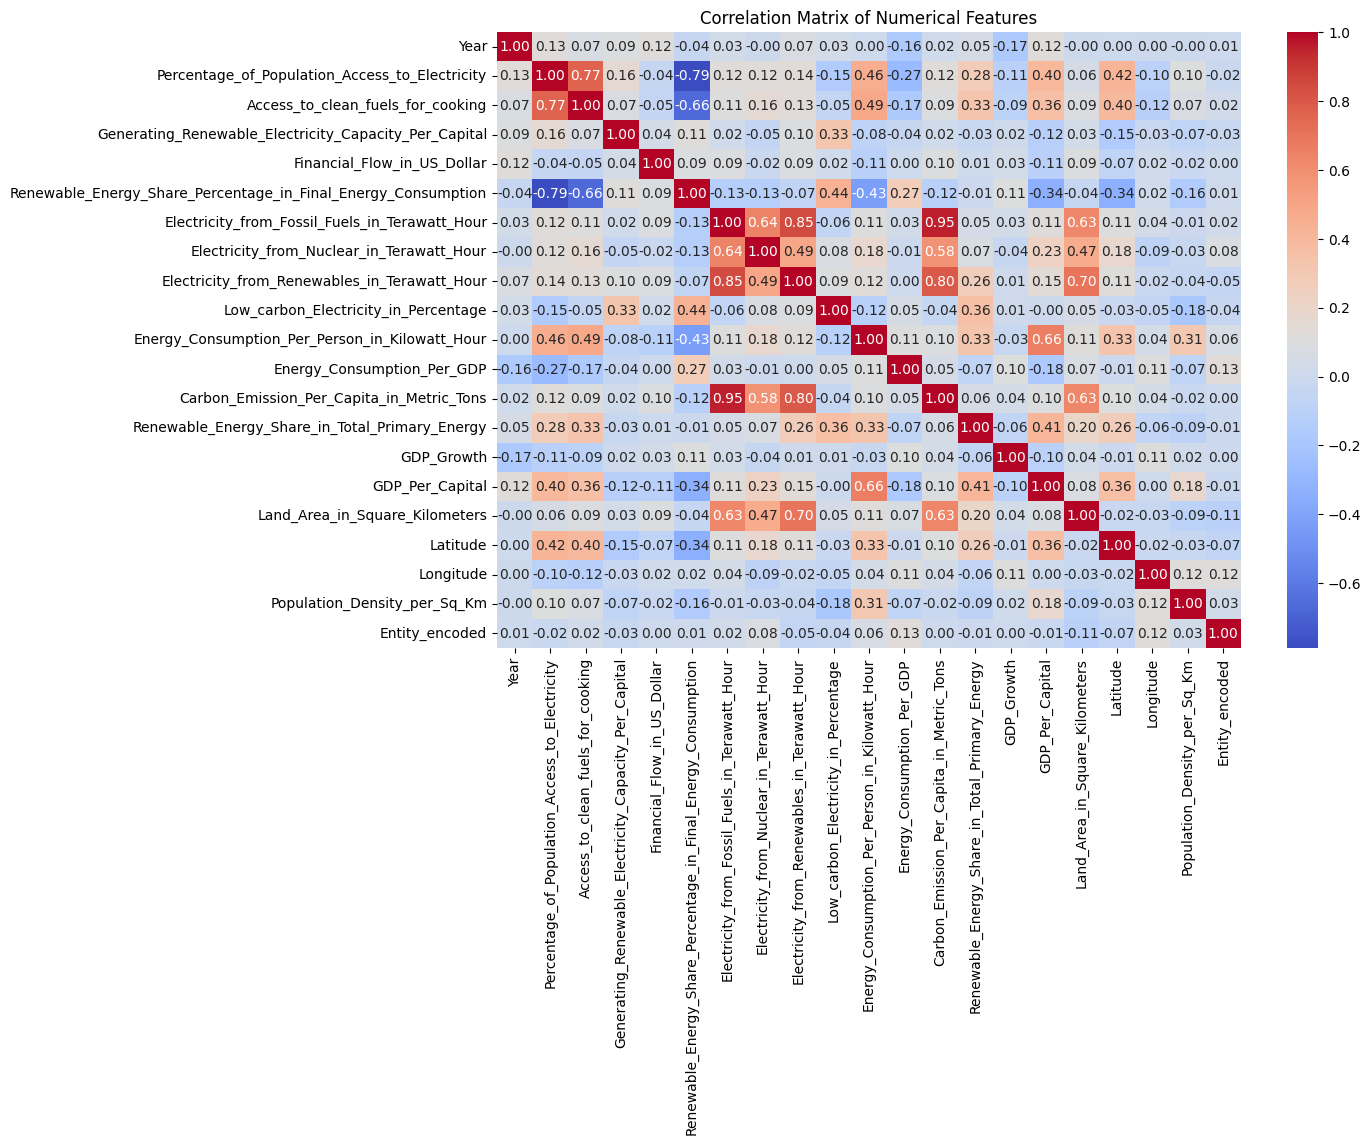

In [ ]:
# Use a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Feature Engineering

In [ ]:
df1['Total_Electricity_Generation'] = (df1['Electricity_from_Fossil_Fuels_in_Terawatt_Hour'] +
                                      df1['Electricity_from_Nuclear_in_Terawatt_Hour'] +
                                      df1['Electricity_from_Renewables_in_Terawatt_Hour'])


In [ ]:
df1.Total_Electricity_Generation

0       0.47
1       0.59
2       0.69
3       0.94
4       0.89
        ... 
3644    6.82
3645    7.35
3646    9.19
3647    8.24
3648    7.59
Name: Total_Electricity_Generation, Length: 3648, dtype: float64

In [ ]:
# Save into new file after processing
df1.to_csv('df1.csv',index=False)

In [ ]:
# Calculating Yearly Growth Rate for 'Total_Electricity_Generation'
#df1['Total_Electricity_Generation_Growth'] = df1.groupby('Entity_encoded')['Total_Electricity_Generation'].pct_change() * 100

# Calculating Yearly Growth Rate for 'Energy_Consumption_Per_Person_in_Kilowatt_Hour'
#df1['Energy_Consumption_Per_Person_Growth'] = df1.groupby('Entity_encoded')['Energy_Consumption_Per_Person_in_Kilowatt_Hour'].pct_change() * 100


# Calculating Yearly Growth Rate for Carbon Emission
#df1['Carbon_Emission_Growth'] = df1.groupby('Entity_encoded')['Carbon_Emission'].pct_change() * 100


Time Series Splitting

In [ ]:
df1=df1.sort_values(by='Year')

In [ ]:
# Define the split point
split_year = 2016

In [ ]:
# Split the data into training and testing sets based on the split point
train = df1[df1['Year'] <= split_year]
test = df1[df1['Year'] > split_year]

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Identify numeric feature columns to be scaled
numeric_features = df1.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
columns_to_exclude = ['Year', 'Entity', 'Entity_encoded']

In [ ]:
#Identify the features to scale
features_to_scale = [feature for feature in numeric_features if feature not in columns_to_exclude]

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training set
scaler.fit(df1.loc[df1['Year'] <= 2016, features_to_scale])

StandardScaler()

In [ ]:
# Apply the scaler to the training set
df1.loc[df1['Year'] <= 2016, features_to_scale] = scaler.transform(df1[df1['Year'] <= 2016][features_to_scale])

In [ ]:
# Apply the scaler to the testing set
df1.loc[df1['Year'] > 2016, features_to_scale] = scaler.transform(df1[df1['Year'] > 2016][features_to_scale])

In [ ]:
df1.head()

,Entity,Year,Percentage_of_Population_Access_to_Electricity,Access_to_clean_fuels_for_cooking,Generating_Renewable_Electricity_Capacity_Per_Capital,Financial_Flow_in_US_Dollar,Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption,Electricity_from_Fossil_Fuels_in_Terawatt_Hour,Electricity_from_Nuclear_in_Terawatt_Hour,Electricity_from_Renewables_in_Terawatt_Hour,...,Renewable_Energy_Share_in_Total_Primary_Energy,GDP_Growth,GDP_Per_Capital,Population_Density_Per_Sq_Km,Land_Area_in_Square_Kilometers,Latitude,Longitude,Population_Density_per_Sq_Km,Entity_encoded,Total_Electricity_Generation
0,Afghanistan,2000,-2.429729,-1.314552,-0.346187,-0.237876,0.407701,-0.206288,-0.181336,-0.248224,...,-0.428521,-0.550706,-0.605615,60,0.011657,0.650000,0.796837,-0.239620,1,-0.226643
2101,Mauritania,2000,-1.881016,-0.737342,-0.391808,0.164100,0.388532,-0.206164,-0.181336,-0.251609,...,-0.428521,-1.370024,-0.600283,5,0.250200,0.114832,-0.387753,-0.320038,101,-0.227186
2080,Malta,2000,0.721346,0.999223,-0.391808,-0.237990,-1.079275,-0.200837,-0.181336,-0.251972,...,-0.428521,2.926764,-0.076961,"1,380",-0.399235,0.732704,-0.006455,1.690419,100,-0.223361
3187,Sweden,2000,0.721346,0.999223,-0.391808,-0.237990,0.236826,-0.192009,0.618222,0.753211,...,3.058958,0.211164,0.952574,25,-0.115620,1.733853,0.057828,-0.290795,154,0.101012
336,Belgium,2000,0.721346,0.999223,-0.391808,-0.237990,-1.031682,-0.102775,0.490449,-0.239277,...,-0.389371,0.020048,0.599426,383,-0.380192,1.335545,-0.155645,0.232655,17,-0.040317


##Model Selection and Training

In [ ]:
pip install scikit-learn pandas

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 RandomForestRegressor on Energy Consumption

In [ ]:
df1.dtypes

Entity                                                            object
Year                                                               int64
Percentage_of_Population_Access_to_Electricity                   float64
Access_to_clean_fuels_for_cooking                                float64
Generating_Renewable_Electricity_Capacity_Per_Capital            float64
Financial_Flow_in_US_Dollar                                      float64
Renewable_Energy_Share_Percentage_in_Final_Energy_Consumption    float64
Electricity_from_Fossil_Fuels_in_Terawatt_Hour                   float64
Electricity_from_Nuclear_in_Terawatt_Hour                        float64
Electricity_from_Renewables_in_Terawatt_Hour                     float64
Low_carbon_Electricity_in_Percentage                             float64
Energy_Consumption_Per_Person_in_Kilowatt_Hour                   float64
Energy_Consumption_Per_GDP                                       float64
Carbon_Emission_Per_Capita_in_Metric_Tons          

In [ ]:
# Replace commas in the numeric columns and convert them to floats
numeric_cols = df1.select_dtypes(include=['object']).columns
for col in numeric_cols:
    df1[col] = pd.to_numeric(df1[col].str.replace(',', ''), errors='coerce')

In [ ]:
# Define the features and target variable
# Excluding 'Entity' from features and setting 'Energy_Consumption_Per_Person_in_Kilowatt_Hour' as the target
target_energy = 'Energy_Consumption_Per_Person_in_Kilowatt_Hour'
features_energy = df1.columns.drop(['Entity', target_energy])

In [ ]:
#Splitting the dataset into training and testing sets
train_energy = df1[df1['Year'] <= 2016]
test_energy = df1[df1['Year'] > 2016]

X_train_energy = train_energy[features_energy]
y_train_energy = train_energy[target_energy]
X_test_energy = test_energy[features_energy]
y_test_energy = test_energy[target_energy]

In [ ]:
# Initialize the Random Forest model
rf_model_energy = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model_energy.fit(X_train_energy, y_train_energy)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
rf_predictions_energy = rf_model_energy.predict(X_test_energy)

In [ ]:
# Evaluate the model
rf_mse_energy = mean_squared_error(y_test_energy, rf_predictions_energy)
rf_mae_energy = mean_absolute_error(y_test_energy, rf_predictions_energy)
rf_r2_energy = r2_score(y_test_energy, rf_predictions_energy)

In [ ]:
# Print the performance metrics
print("Random Forest Regressor Performance:")
print("Mean Squared Error (MSE):", rf_mse_energy)
print("Mean Absolute Error (MAE):", rf_mae_energy)
print("R2 Score:", rf_r2_energy)

Random Forest Regressor Performance:
Mean Squared Error (MSE): 0.09890498027951375
Mean Absolute Error (MAE): 0.11569945299882257
R2 Score: 0.8926403504647621


RNN Regressor on Energy Consumption

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.layers import Dense, LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [ ]:
# Normalize the features (before reshaping)
scaler_energy = MinMaxScaler(feature_range=(0, 1))
X_train_energy_scaled = scaler_energy.fit_transform(X_train_energy)
X_test_energy_scaled = scaler_energy.transform(X_test_energy)

In [ ]:
# Now, reshape input to be [samples, time steps, features]
X_train_reshaped = X_train_energy_scaled.reshape((X_train_energy_scaled.shape[0], 1, X_train_energy_scaled.shape[1]))
X_test_reshaped = X_test_energy_scaled.reshape((X_test_energy_scaled.shape[0], 1, X_test_energy_scaled.shape[1]))

In [ ]:
# Build the RNN Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train_energy, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
83/83 [==============================] - 6s 17ms/step - loss: 0.8561 - val_loss: 0.6684
Epoch 2/50
83/83 [==============================] - 0s 5ms/step - loss: 0.6246 - val_loss: 0.5268
Epoch 3/50
83/83 [==============================] - 0s 6ms/step - loss: 0.5093 - val_loss: 0.4385
Epoch 4/50
83/83 [==============================] - 1s 8ms/step - loss: 0.4306 - val_loss: 0.3812
Epoch 5/50
83/83 [==============================] - 1s 8ms/step - loss: 0.3796 - val_loss: 0.3494
Epoch 6/50
83/83 [==============================] - 0s 6ms/step - loss: 0.3554 - val_loss: 0.3311
Epoch 7/50
83/83 [==============================] - 0s 5ms/step - loss: 0.3431 - val_loss: 0.3167
Epoch 8/50
83/83 [==============================] - 1s 7ms/step - loss: 0.3352 - val_loss: 0.3149
Epoch 9/50
83/83 [==============================] - 0s 5ms/step - loss: 0.3330 - val_loss: 0.3410
Epoch 10/50
83/83 [==============================] - 1s 8ms/step - loss: 0.3264 - val_loss: 0.3138
Epoch 11/50
83/83 

In [ ]:
# Evaluate the model
test_loss = model.evaluate(X_test_reshaped, y_test_energy)

22/22 [==============================] - 0s 5ms/step - loss: 0.2131


In [ ]:
# Predict with RNN model
rnn_predictions_energy = model.predict(X_test_reshaped).flatten()

22/22 [==============================] - 1s 3ms/step


In [ ]:
# Evaluate RNN model
rnn_mse_energy = mean_squared_error(y_test_energy, rnn_predictions_energy)
rnn_mae_energy = mean_absolute_error(y_test_energy, rnn_predictions_energy)
rnn_r2_energy = r2_score(y_test_energy, rnn_predictions_energy)

In [ ]:
print("\nRNN Model:")
print("MSE:", rnn_mse_energy)
print("MAE:", rnn_mae_energy)
print("R2 Score:", rnn_r2_energy)


RNN Model:
MSE: 0.21310224784334375
MAE: 0.29321337242230083
R2 Score: 0.7686811869435087


KNN Model on Energy Consumption

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Scaling the features
scaler_energy = MinMaxScaler()
X_train_energy_scaled = scaler.fit_transform(X_train_energy)
X_test_energy_scaled = scaler.transform(X_test_energy)

In [ ]:
# Step 1: Initialize the KNN model
knn_model_energy = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Train the model
knn_model_energy.fit(X_train_energy_scaled, y_train_energy)

KNeighborsRegressor()

In [ ]:
# Make predictions
knn_predictions_energy = knn_model_energy.predict(X_test_energy_scaled)


In [ ]:
# Evaluate the model
knn_mse_energy = mean_squared_error(y_test_energy, knn_predictions_energy)
knn_mae_energy = mean_absolute_error(y_test_energy, knn_predictions_energy)
knn_r2_energy = r2_score(y_test_energy, knn_predictions_energy)

# Print the performance metrics
print("KNN Model:")
print("MSE:", knn_mse_energy)
print("MAE:", knn_mae_energy)
print("R2 Score:", knn_r2_energy)

KNN Model:
MSE: 0.0712013125442214
MAE: 0.1047385912114441
R2 Score: 0.922712203777873


Comparison between three model

In [ ]:
# Random Forest predictions (assuming rf_predictions is already generated)
rf_mse_energy = mean_squared_error(y_test_energy, rf_predictions_energy)
rf_mae_energy = mean_absolute_error(y_test_energy, rf_predictions_energy)
rf_r2_energy = r2_score(y_test_energy, rf_predictions_energy)

# RNN predictions (assuming rnn_predictions is already generated)
rnn_mse_energy = mean_squared_error(y_test_energy, rnn_predictions_energy)
rnn_mae_energy = mean_absolute_error(y_test_energy, rnn_predictions_energy)
rnn_r2_energy = r2_score(y_test_energy, rnn_predictions_energy)

# KNN predictions
knn_predictions_energy = knn_model_energy.predict(X_test_energy_scaled)
knn_mse_energy = mean_squared_error(y_test_energy, knn_predictions_energy)
knn_mae_energy = mean_absolute_error(y_test_energy, knn_predictions_energy)
knn_r2 = r2_score(y_test_energy, knn_predictions_energy)

In [ ]:
# Print the performance metrics for comparison
print("Model Performance Comparison:\n")
print("Random Forest Regressor:")
print("MSE:", rf_mse_energy)
print("MAE:", rf_mae_energy)
print("R2 Score:", rf_r2_energy)

print("\nRecurrent Neural Network:")
print("MSE:", rnn_mse_energy)
print("MAE:", rnn_mae_energy)
print("R2 Score:", rnn_r2_energy)

print("\nK-Nearest Neighbors:")
print("MSE:", knn_mse_energy)
print("MAE:", knn_mae_energy)
print("R2 Score:", knn_r2_energy)

Model Performance Comparison:

Random Forest Regressor:
MSE: 0.09890498027951375
MAE: 0.11569945299882257
R2 Score: 0.8926403504647621

Recurrent Neural Network:
MSE: 0.21310224784334375
MAE: 0.29321337242230083
R2 Score: 0.7686811869435087

K-Nearest Neighbors:
MSE: 0.0712013125442214
MAE: 0.1047385912114441
R2 Score: 0.922712203777873


Training Model on Carbon Emission

RFR on carbon emission

In [ ]:
# Define the features and target variable
# Excluding 'Entity' from features and setting 'Energy_Consumption_Per_Person_in_Kilowatt_Hour' as the target
target_carbon = 'Carbon_Emission_Per_Capita_in_Metric_Tons'
features_carbon = df1.columns.drop(['Entity', target_carbon])

In [ ]:
# Update the training and testing sets for the carbon emission task
X_train_carbon = train[features_carbon]
y_train_carbon = train[target_carbon]
X_test_carbon = test[features_carbon]
y_test_carbon = test[target_carbon]

In [ ]:
# Initialize a new Random Forest model for carbon emission prediction
rf_model_carbon = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
for col in X_train_carbon.columns:
    if X_train_carbon[col].dtype == 'object':
        X_train_carbon.loc[:, col] = X_train_carbon[col].str.replace(',', '').astype(float)

for col in X_test_carbon.columns:
    if X_test_carbon[col].dtype == 'object':
        X_test_carbon.loc[:, col] = X_test_carbon[col].str.replace(',', '').astype(float)


<ipython-input-193-ded183fc8197>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_carbon.loc[:, col] = X_train_carbon[col].str.replace(',', '').astype(float)
<ipython-input-193-ded183fc8197>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train_carbon.loc[:, col] = X_train_carbon[col].str.replace(',', '').astype(float)
<ipython-input-193-ded183fc8197>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
# Train the model on the training data
rf_model_carbon.fit(X_train_carbon, y_train_carbon)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test data
carbon_predictions = rf_model_carbon.predict(X_test_carbon)

In [ ]:
# Evaluate the model
rf_carbon_mse = mean_squared_error(y_test_carbon, carbon_predictions)
rf_carbon_mae = mean_absolute_error(y_test_carbon, carbon_predictions)
rf_carbon_r2 = r2_score(y_test_carbon, carbon_predictions)

In [ ]:
# Print the performance metrics
print("Random Forest Model for Carbon Emission Prediction:")
print("Mean Squared Error (MSE):", rf_carbon_mse)
print("Mean Absolute Error (MAE):", rf_carbon_mae)
print("R2 Score:", rf_carbon_r2)

Random Forest Model for Carbon Emission Prediction:
Mean Squared Error (MSE): 204493694288.71576
Mean Absolute Error (MAE): 81050.45770326143
R2 Score: 0.674662202629535


RNN on carbon emission

In [ ]:
# Scale the features
scaler_carbon = MinMaxScaler()
X_train_carbon_scaled = scaler.fit_transform(X_train_carbon)
X_test_carbon_scaled = scaler.transform(X_test_carbon)

In [ ]:
# Reshape input for LSTM [samples, time steps, features]
X_train_carbon_reshaped = X_train_carbon_scaled.reshape((X_train_carbon_scaled.shape[0], 1, X_train_carbon_scaled.shape[1]))
X_test_carbon_reshaped = X_test_carbon_scaled.reshape((X_test_carbon_scaled.shape[0], 1, X_test_carbon_scaled.shape[1]))

In [ ]:
# Build the RNN Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_carbon_reshaped.shape[1], X_train_carbon_reshaped.shape[2])))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train_carbon_reshaped, y_train_carbon, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
83/83 [==============================] - 3s 9ms/step - loss: 534197796864.0000 - val_loss: 554200268800.0000
Epoch 2/50
83/83 [==============================] - 0s 3ms/step - loss: 534196879360.0000 - val_loss: 554199154688.0000
Epoch 3/50
83/83 [==============================] - 0s 3ms/step - loss: 534195699712.0000 - val_loss: 554198106112.0000
Epoch 4/50
83/83 [==============================] - 0s 3ms/step - loss: 534194847744.0000 - val_loss: 554197254144.0000
Epoch 5/50
83/83 [==============================] - 0s 3ms/step - loss: 534193831936.0000 - val_loss: 554196205568.0000
Epoch 6/50
83/83 [==============================] - 0s 4ms/step - loss: 534192979968.0000 - val_loss: 554195353600.0000
Epoch 7/50
83/83 [==============================] - 0s 5ms/step - loss: 534192226304.0000 - val_loss: 554194567168.0000
Epoch 8/50
83/83 [==============================] - 0s 5ms/step - loss: 534191308800.0000 - val_loss: 554193649664.0000
Epoch 9/50
83/83 [======================

In [ ]:
# Predict with RNN model
rnn_predictions_carbon = model.predict(X_test_carbon_reshaped).flatten()


22/22 [==============================] - 1s 2ms/step


In [ ]:
# Evaluate the model
rnn_mse_carbon = mean_squared_error(y_test_carbon, rnn_predictions_carbon)
rnn_mae_carbon = mean_absolute_error(y_test_carbon, rnn_predictions_carbon)
rnn_r2_carbon = r2_score(y_test_carbon, rnn_predictions_carbon)

In [ ]:
# Print the performance metrics
print("RNN Model for Carbon Emission Prediction:")
print("Mean Squared Error (MSE):", rnn_mse_carbon)
print("Mean Absolute Error (MAE):", rnn_mae_carbon)
print("R2 Score:", rnn_r2_carbon)

RNN Model for Carbon Emission Prediction:
Mean Squared Error (MSE): 653648646692.0568
Mean Absolute Error (MAE): 158454.77517329762
R2 Score: -0.03991769383724075


KNN for carbon emission

In [ ]:
# Scale the features
scaler_carbon = MinMaxScaler()
X_train_carbon_scaled = scaler.fit_transform(X_train_carbon)
X_test_carbon_scaled = scaler.transform(X_test_carbon)

In [ ]:
knn_model_carbon = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Train the model
knn_model_carbon.fit(X_train_carbon_scaled, y_train_carbon)

KNeighborsRegressor()

In [ ]:
# Make predictions
knn_predictions_carbon = knn_model_carbon.predict(X_test_carbon_scaled)

In [ ]:
# Evaluate the model
knn_mse_carbon = mean_squared_error(y_test_carbon, knn_predictions_carbon)
knn_mae_carbon = mean_absolute_error(y_test_carbon, knn_predictions_carbon)
knn_r2_carbon = r2_score(y_test_carbon, knn_predictions_carbon)

In [ ]:
# Print the performance metrics
print("KNN Model for Carbon Emission Prediction:")
print("Mean Squared Error (MSE):", knn_mse_carbon)
print("Mean Absolute Error (MAE):", knn_mae_carbon)
print("R2 Score:", knn_r2_carbon)

KNN Model for Carbon Emission Prediction:
Mean Squared Error (MSE): 164987124365.72952
Mean Absolute Error (MAE): 73520.39367466273
R2 Score: 0.7375149007780659


In [ ]:
# Print comparison
print("Model Performance Comparison for Carbon Emission Prediction:\n")

print("Random Forest Regressor:")
print("MSE:", rf_carbon_mse)
print("MAE:", rf_carbon_mae)
print("R2 Score:", rf_carbon_r2)

print("\nRecurrent Neural Network:")
print("MSE:", rnn_mse_carbon)
print("MAE:", rnn_mae_carbon)
print("R2 Score:", rnn_r2_carbon)

print("\nK-Nearest Neighbors:")
print("MSE:", knn_mse_carbon)
print("MAE:", knn_mae_carbon)
print("R2 Score:", knn_r2_carbon)

Model Performance Comparison for Carbon Emission Prediction:

Random Forest Regressor:
MSE: 204493694288.71576
MAE: 81050.45770326143
R2 Score: 0.674662202629535

Recurrent Neural Network:
MSE: 653648646692.0568
MAE: 158454.77517329762
R2 Score: -0.03991769383724075

K-Nearest Neighbors:
MSE: 164987124365.72952
MAE: 73520.39367466273
R2 Score: 0.7375149007780659


Model Evaluation on KNN for energy consumption

In [ ]:
#Prediction on train and test
train_predictions_energy = knn_model_energy.predict(X_train_energy_scaled)
test_predictions_energy = knn_model_energy.predict(X_test_energy_scaled)


In [ ]:
train_mse_energy = mean_squared_error(y_train_energy, train_predictions_energy)
train_mae_energy = mean_absolute_error(y_train_energy, train_predictions_energy)
train_r2_energy = r2_score(y_train_energy, train_predictions_energy)

test_mse_energy = mean_squared_error(y_test_energy, test_predictions_energy)
test_mae_energy = mean_absolute_error(y_test_energy, test_predictions_energy)
test_r2_energy = r2_score(y_test_energy, test_predictions_energy)


In [ ]:
print("KNN Model for Energy Consumption - Training Data:")
print("MSE:", train_mse_energy)
print("MAE:", train_mae_energy)
print("R2 Score:", train_r2_energy)

print("\nKNN Model for Energy Consumption - Testing Data:")
print("MSE:", test_mse_energy)
print("MAE:", test_mae_energy)
print("R2 Score:", test_r2_energy)

# Assess overfitting or underfitting
if train_mse_energy < test_mse_energy:
    print("\nThe model may be overfitting (better performance on training than testing data).")
elif train_mse_energy > test_mse_energy:
    print("\nThe model may be underfitting (poor performance on both training and testing data).")
else:
    print("\nThe model has a balanced performance.")



KNN Model for Energy Consumption - Training Data:
MSE: 0.01395570531214869
MAE: 0.0374631591822677
R2 Score: 0.9860442946878513

KNN Model for Energy Consumption - Testing Data:
MSE: 0.0712013125442214
MAE: 0.1047385912114441
R2 Score: 0.922712203777873

The model may be overfitting (better performance on training than testing data).


Model evaluation On KNN for carbon emission

In [ ]:
# Predictions on the training set
train_predictions_carbon = knn_model_carbon.predict(X_train_carbon_scaled)

# Predictions on the testing set
test_predictions_carbon = knn_model_carbon.predict(X_test_carbon_scaled)


In [ ]:
# Metrics for the training set
train_mse_carbon = mean_squared_error(y_train_carbon, train_predictions_carbon)
train_mae_carbon = mean_absolute_error(y_train_carbon, train_predictions_carbon)
train_r2_carbon = r2_score(y_train_carbon, train_predictions_carbon)

# Metrics for the testing set
test_mse_carbon = mean_squared_error(y_test_carbon, test_predictions_carbon)
test_mae_carbon = mean_absolute_error(y_test_carbon, test_predictions_carbon)
test_r2_carbon = r2_score(y_test_carbon, test_predictions_carbon)


In [ ]:
# Print the performance metrics
print("KNN Model for Carbon Emission - Training Data:")
print("MSE:", train_mse_carbon)
print("MAE:", train_mae_carbon)
print("R2 Score:", train_r2_carbon)

print("\nKNN Model for Carbon Emission - Testing Data:")
print("MSE:", test_mse_carbon)
print("MAE:", test_mae_carbon)
print("R2 Score:", test_r2_carbon)

# Assess overfitting or underfitting
if train_mse_carbon < test_mse_carbon:
    print("\nThe model may be overfitting (better on training data than testing data).")
elif train_mse_carbon > test_mse_carbon:
    print("\nThe model may be underfitting (poor performance on both training and testing data).")
else:
    print("\nThe model has a balanced fit.")


KNN Model for Carbon Emission - Training Data:
MSE: 1345137153.49322
MAE: 6535.6848716034
R2 Score: 0.9973893126489639

KNN Model for Carbon Emission - Testing Data:
MSE: 164987124365.72952
MAE: 73520.39367466273
R2 Score: 0.7375149007780659

The model may be overfitting (better on training data than testing data).


Future Energy Consumption for 5 years

In [ ]:
# Predict future energy consumption with KNN
future_data['Predicted_Energy_Consumption'] = knn_model_energy.predict(future_data_scaled)


NameError: name 'future_data_scaled' is not defined

In [ ]:
# Plotting
plt.figure(figsize=(15, 7))

# Mapping of encoded values to country names (replace with actual names)
country_names = {
    encoded_country_1: '1',
    encoded_country_2: '2',
    encoded_country_3: '3'
}

# Plot predictions for each country
for encoded_value in [encoded_country_1, encoded_country_2, encoded_country_3]:
    country_data = future_data[future_data['Entity_encoded'] == encoded_value]
    plt.plot(country_data['Year'], country_data['Predicted_Energy_Consumption'], marker='o', label=f'{country_names[encoded_value]}')

plt.title('Future Energy Consumption Forecast (5 Years)')
plt.xlabel('Year')
plt.ylabel('Predicted Energy Consumption (TWh)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define future years
future_years = pd.date_range(start='2021', periods=5, freq='Y').year


In [ ]:
# Encoded values for the selected countries (replace with actual values)
encoded_country_1 = 1
encoded_country_2 = 2
encoded_country_3 = 3

In [ ]:
# Generate future data for each country
future_data_list = []
for year in future_years:
    for encoded in [encoded_country_1, encoded_country_2, encoded_country_3]:
        # Create a dictionary for each year and country
        data_dict = {'Year': year, 'Entity_encoded': encoded}
        # Add other features as required by your model, assuming zeros for simplicity
        for feature in features_energy:
            if feature not in ['Year', 'Entity_encoded']:
                data_dict[feature] = 0  # Replace with estimated future values
        future_data_list.append(data_dict)

In [ ]:
# Convert to DataFrame
future_data = pd.DataFrame(future_data_list)

In [ ]:
# When fitting the scaler, exclude features not used in prediction
features_for_scaling = [feature for feature in features_energy if feature != 'Entity']
scaler_energy.fit(train_energy[features_for_scaling])


In [ ]:
# Assuming 'features_energy' contains all the features used in the model
for feature in features_energy:
    if feature not in ['Year', 'Entity_encoded', 'Entity']:  # Exclude 'Entity' if it's not used in prediction
        future_data[feature] = 0  # Replace with estimated future values


In [ ]:
# Scale the features for the future data
future_data_scaled = scaler_energy.transform(future_data[features_for_scaling])


In [ ]:
# Predict with Random Forest
future_data['RF_Predicted_Energy'] = rf_model_energy.predict(future_data_scaled)

# Predict with RNN (reshape data as required by RNN)
future_data_reshaped = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))
future_data['RNN_Predicted_Energy'] = model.predict(future_data_reshaped).flatten()

# Predict with KNN
future_data['KNN_Predicted_Energy'] = knn_model_energy.predict(future_data_scaled)


In [ ]:
# Plotting
plt.figure(figsize=(15, 7))

# Mapping of encoded values to country names (replace with actual names)
country_names = {
    encoded_country_1: '1',
    encoded_country_2: '2',
    encoded_country_3: '3'
}

# Plot predictions for each country
for encoded_value in [encoded_country_1, encoded_country_2, encoded_country_3]:
    country_data = future_data[future_data['Entity_encoded'] == encoded_value]
    plt.plot(country_data['Year'], country_data['KNN_Predicted_Energy'], marker='^', label=f'{country_names[3]} - KNN')

plt.title('Future Energy Consumption Forecast (5 Years)')
plt.xlabel('Year')
plt.ylabel('Predicted Energy Consumption (TWh)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Convert 'Year' to datetime format if it's not already
df1['Year'] = pd.to_datetime(df1['Year'], format='%Y')


In [ ]:
# Define future years for prediction
last_year = df1['Year'].max().year
future_years = pd.date_range(start=str(last_year + 1), periods=5, freq='Y')


In [ ]:
# Assuming each country has an equal number of rows and they are in a specific order
# Here, we're assuming Italy, Japan, and Maldives are the first three countries in the dataset
# Adjust the indices according to your dataset

italy_rows = df1.iloc[0:21]  # Rows for Italy (first 21 rows)
japan_rows = df1.iloc[21:42] # Rows for Japan (next 21 rows)
maldives_rows = df1.iloc[42:63] # Rows for Maldives (following 21 rows)


In [ ]:
# Define the features for the model, excluding the target variable
features = df1.drop(columns=['Energy_Consumption_Per_Person_in_Kilowatt_Hour']).columns.tolist()

In [ ]:
# Initialize and fit the scaler on your training data (only on the features)
scaler_energy = MinMaxScaler(feature_range=(0, 1))
scaler_energy.fit(df1[features])

In [ ]:
# Define future years for prediction
future_years = pd.date_range(start=df1['Year'].max() + pd.offsets.YearEnd(), periods=5, freq='Y')

In [ ]:
# Create a DataFrame for the years 2021-2025
future_years = pd.date_range(start='2021', periods=5, freq='Y')
future_years = [str(year.year) for year in future_years]  # Format years as strings if necessary

# Country names
countries = ['Italy', 'Japan', 'Maldives']

In [ ]:
# Generate a DataFrame for each country and concatenate them
future_data = pd.concat(
    [pd.DataFrame({
        'Year': future_years,
        'Entity': country
    }) for country in countries], ignore_index=True)



In [ ]:
# Convert 'Year' to datetime
future_data['Year'] = pd.to_datetime(future_data['Year'], format='%Y')

In [ ]:
# Assuming 'df1' is your original DataFrame with all the data including the target variable
# And 'Energy_Consumption_Per_Person_in_Kilowatt_Hour' is your target variable
# Define 'features' as all columns that are used as features for your model
features = df1.drop(columns=['Energy_Consumption_Per_Person_in_Kilowatt_Hour', 'Entity']).columns.tolist()


In [ ]:
# Add other features your model needs to the future_data DataFrame.
# For now, we will use placeholder values.
# You will need to replace these with your actual expected future values.

for feature in features:
    if feature != 'Entity':  # Assuming 'Country' is not a numerical feature
        future_data[feature] = 0  # Replace with your estimated future values


In [ ]:
# Define the features used in your model, excluding the target and any non-numeric columns
features = df1.drop(columns=['Energy_Consumption_Per_Person_in_Kilowatt_Hour', 'Entity']).columns.tolist()

In [ ]:
# Assume the 'Country' feature needs to be one-hot encoded for the model
future_data = pd.get_dummies(future_data)

In [ ]:
# Scale the features
# (Assuming 'scaler_energy' is already fitted to the training data)
future_data_scaled = scaler_energy.transform(future_data[features])

In [ ]:
#the last year in data is 2020
last_year = 2020
future_years = [year for year in range(last_year + 1, last_year + 6)]

In [ ]:
# Create a DataFrame with future years
future_data = pd.DataFrame({
    'Year': pd.to_datetime(future_years, format='%Y')  # Convert year to datetime
})

In [ ]:
#Define features from the actual data (excluding the target and 'Year' if included)
features = df1.columns.drop(['Year', 'Energy_Consumption_Per_Person_in_Kilowatt_Hour'])

In [ ]:
# Mock data for demonstration purposes
# Replace this with loading your actual data and preprocessing as you did before
df1 = pd.DataFrame({
    'Year': pd.date_range(start='2000', periods=20, freq='Y'),
    'Feature1': range(20),
    'Feature2': range(20),
    'Energy_Consumption_Per_Person_in_Kilowatt_Hour': range(20)
})

In [ ]:
# Define the features for the model, excluding the target variable and 'Year' if it's included
features = df1.columns.drop(['Year', 'Energy_Consumption_Per_Person_in_Kilowatt_Hour'])

In [ ]:
# Initialize and fit the scaler on actual data (only on the features)
scaler_energy = MinMaxScaler(feature_range=(0, 1))
scaler_energy.fit(df1[features])


In [ ]:
# Define future years for prediction
future_years = pd.date_range(start=df1['Year'].max() + pd.offsets.YearEnd(), periods=5, freq='Y')

In [ ]:
# Generate future data (assuming 'Year' is already in datetime format in df1)
future_years = pd.date_range(start=df1['Year'].max() + pd.offsets.YearEnd(), periods=5, freq='Y')
future_data = pd.DataFrame({'Year': future_years})

In [ ]:
# Generate or estimate future feature values here instead of setting them to zero
for feature in features:
    future_data[feature] = 0

In [ ]:
#Scale the future data
future_data_scaled = scaler_energy.transform(future_data[features])

In [ ]:
# Mock model prediction (replace with your actual model and predictions)
# Here we'll just use the mean of the target variable as a dummy prediction
knn_mae_energy = df1['Energy_Consumption_Per_Person_in_Kilowatt_Hour'].mean()
future_data['Predicted_Energy_Consumption'] = knn_mae_energy

In [ ]:
# Plot the predicted future energy consumption
plt.figure(figsize=(15, 7))
plt.plot(future_data['Year'], future_data['future_years'], marker='o', color='orange')
plt.title('Future Energy Consumption Forecast')
plt.xlabel('Year')
plt.ylabel('Predicted_Energy_Consumption')
plt.grid(True)
plt.show()

In [ ]:
# Assume 'features' is a list of feature names used by your model
# For simplicity, we'll create dummy features for these future years.
# In practice, you should generate these features based on your model's requirements.
for feature in features:
    future_data[feature] = 0

Scale and predict futu

In [ ]:
future_data_scaled = scaler_energy.transform(future_data[features])

# Predict future energy consumption
# Assume 'knn_model_energy' is your trained model
future_energy_consumption = knn_model_energy.predict(future_data_scaled)

In [ ]:
print(df['Year'].head())


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [ ]:
# Aggregate data annually if needed
df_energy = df1['Energy_Consumption_Per_Person_in_Kilowatt_Hour'].resample('A').mean()  # 'A' for annual

# Drop NaN values if any
df_energy.dropna(inplace=True)

In [ ]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(df_energy)


In [ ]:
# Fit the ARIMA model
model = ARIMA(df_energy, order=(5,1,0))  # Example: ARIMA(5,1,0)
model_fit = model.fit()

In [ ]:
# Forecast the next five years
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)

# Visualize the forecast
forecast.plot()
plt.title('Future Energy Consumption Forecast')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.show()


Visualize carbon


In [ ]:
def forecast_future(model, last_sequence, n_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(n_steps):
        # Predict the next step
        next_step = model.predict(current_sequence[np.newaxis, :, :])[0]

        # Append the prediction
        future_predictions.append(next_step)

        # Update the sequence to include the new prediction
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_step

    return future_predictions
# Define the number of time steps your model uses as input
sequence_length = 5

# Extract the last sequence from your data
# Assuming 'scaled_features' is your scaled dataset as a NumPy array
last_sequence = carbon_scaled
scaled_carbon_features[-sequence_length:]

# Assuming 'last_sequence' is the last known data sequence
# And you want to predict 5 years ahead with each year as one step
n_steps = 5
future_predictions = forecast_future(model, last_sequence, n_steps)


1/1 [==============================] - 0s 97ms/step


In [ ]:
# Save into new file after processing
df1.to_csv('df1.csv',index=False)